In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import netCDF4 as cdf
import h5py as hdf
from tm5tools import globarea
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from mpl_toolkits.basemap import Basemap
from maptools import select_map
import csv
import sys
from copy import copy
import pandas as pd
import os,sys
from calendar import monthrange,isleap

In [3]:
biomes_sib_koppen=['No Biome Specified',                                          #0
                   'Tall Broadleaf-Evergreen Trees, Climate = Trop. Rainforest', #1
                   'Tall Broadleaf-Evergreen Trees, Climate = Trop. Monsoon',    #2
                  'Tall Broadleaf-Evergreen Trees, Climate = Trop. Savannah',    #3
                  'Tall Broadleaf-Evergreen Trees, Outside South America',       #4
                  'Tall Broadleaf-Deciduous Trees',                              #5
                  'Tall Broadleaf and Needleleaf Trees',                         #6
                  'Tall Needleleaf Trees',                                       #7
                  'Tall Needleleaf-Deciduous Trees',                             #8
                  'Short Vegetation (Savanna)',                                  #9
                  'Short Vegetation (Grasslands)',                               #10
                  'Short Vegetation (None)',                                     #11
                  'Short Broadleaf Shrubs - Bare Soil',                          #12
                  'Short Ground Cover (Tundra)',                                 #13
                  'No Vegetation (Low Latitude Desert)',                         #14
                  'Agriculture']                                                 #15

biomes_sib_koppen2=['Tall Broadleaf-Evergreen Trees, Climate = Trop. Rainforest',  #1
                    'Tall Broadleaf-Evergreen Trees, Climate = Trop. Monsoon',     #2
                    'Tall Broadleaf-Evergreen Trees, Climate = Trop. Savannah',    #3
                    'Tall Broadleaf-Evergreen Trees, Outside South America',       #
                    'Tall Broadleaf-Deciduous Trees',                              #5
                    'Tall Broadleaf and Needleleaf Trees',                         #6
                    'Tall Needleleaf Trees',                                       #7
                    'Tall Needleleaf-Deciduous Trees',                             #8
                    'Short Vegetation (Savanna)',                                  #9
                    'Short Vegetation (Grasslands)',                               #10
                    'Short Vegetation (None)',                                     #11
                    'Short Broadleaf Shrubs - Bare Soil',                          #12
                    'Short Ground Cover (Tundra)',                                 #13
                    'No Vegetation (Low Latitude Desert)',                         #14
                    'Agriculture']

clrs_sib_koppen=['lightgray',     #0
                  'darkblue',      #1
                  'blue',          #2
                  'lightblue',     #3
                  'green',         #4
                  'magenta',       #5
                  'orange',        #6
                  'darkgreen',     #7
                  'yellow',        #8
                  'tan',           #9
                  'lawngreen',     #10
                  'purple',        #11
                  'orangered',     #12
                  'brown',         #13
                  'wheat',         #14
                  'darkslateblue'] #15

clrs_sib_koppen2=[ 'darkblue',      #1
                  'blue',          #2
                  'lightblue',     #3
                  'green',         #4
                  'magenta',       #5
                  'orange',        #6
                  'darkgreen',     #7
                  'yellow',        #8
                  'tan',           #9
                  'lawngreen',     #10
                  'purple',        #11
                  'orangered',     #12
                  'brown',         #13
                  'wheat',         #14
                  'darkslateblue'] #15
           

In [4]:
mf = cdf.Dataset('/Users/botia/daily_fires/amazon_mask.nc')
print mf.file_format 
print mf.dimensions.keys()
print mf.dimensions['longitude'] 
print mf.dimensions['latitude']

# the mask has a 1x1 degree resolution
mask = mf.variables['regionmask'][:]
fac = 86400.*365.*12./1.e15
glarea = globarea(im=360,jm=180)
print glarea.sum()
    

NETCDF4
[u'longitude', u'latitude']
<type 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 360

<type 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 180

5.1006447191e+14


In [5]:
## Creating masks
f = cdf.Dataset('/Storage/CO2/carbontracker/input/ctdas_2012/regions_sibcasa_koppen_sam.nc') # assigning to f the dataset from the netcdf file
print f.dimensions.keys()
print f.dimensions['lat'] 
print f.dimensions['lon']
tc = f.variables['transcom_regions'][:]     #from f the variable transcom_regions is assigned to tc
biomes = f.variables['land_ecosystems'][:]  # This biomes, include the whole world and the ocean has nothing assigned (NaN).
f.close() 
print type(biomes), shape(biomes), type(tc)
                                            #biomes is a masked array



[u'lat', u'lon']
<type 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180

<type 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360

<class 'numpy.ma.core.MaskedArray'> (180, 360) <type 'numpy.ndarray'>


<class 'numpy.ma.core.MaskedArray'>


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


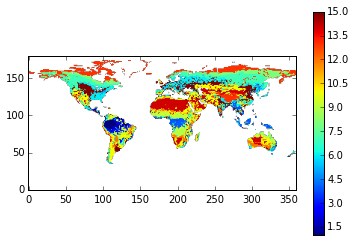

In [6]:
imshow(biomes)
colorbar()
plt.gca().invert_yaxis()
print type(biomes)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]] [[0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 ..., 
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]
 [0.0 0.0 0.0 ..., 0.0 0.0 0.0]] <class 'numpy.ma.core.MaskedArray'>


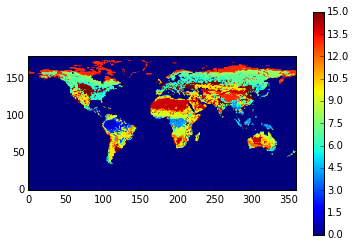

In [7]:
biomes[np.where(biomes.mask)] = 0 # Where biomes is masked (invalid), in the ocean, where the values are invalid for calculations
                                  # as it seen in the white map above, it is set to zero. In this way they become valid and 
                                  # usable. Note that the map begins from zero now
print biomes.mask, biomes, type(biomes)
imshow(biomes)
colorbar()
plt.gca().invert_yaxis()

<class 'numpy.ma.core.MaskedArray'> <class 'numpy.ma.core.MaskedArray'>


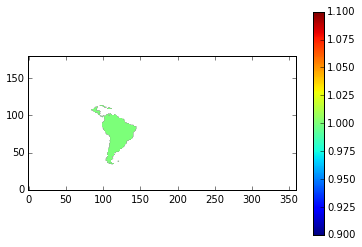

In [8]:
index = np.where(tc <> 3)           # defines an index for the places where the transcom regions are different than 3
tc[index] = 0                       # everywhere in tc where the index is present (not 3) is equal to zero
index = np.where(tc <> 0)           # a new index to redefine tc
tc[index] = 1                       # everywhere in tc where the index is present, 3, is equal to 1
tc = np.ma.masked_where(tc == 0,tc) # masks array where a condition is met, it changes the type of tc to masked array, it was a numpy array
                                    # the condition is that where tc is zero (oceans), it is masked
                                    # numpy.ma.masked_where(condition, a, copy=True)
imshow(tc)
colorbar()
plt.gca().invert_yaxis()
print type (tc),type(biomes)
#OUTPUT: constrained transcom region in southamerica

<class 'numpy.ma.core.MaskedArray'> (180, 360)


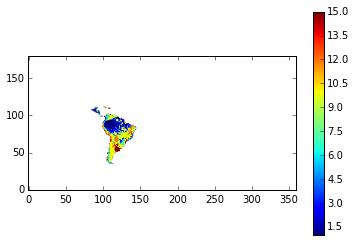

In [9]:
biomes = np.ma.masked_where(tc == 0,biomes) # same as above
biomes = np.ma.masked_where(biomes == 0,biomes)
# Biomes = 0 is the ocean, and tc = 0 is the land, except for SAM, so this places are masked.
imshow(biomes)
colorbar()
plt.gca().invert_yaxis()
print type(biomes), shape(biomes)
#OUTPUT: Biome map for southamerica 

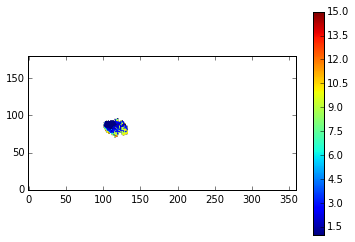

In [10]:
### Constrained biome map for Amazonia
biomes = np.ma.masked_where(mask == 0,biomes) 
imshow(biomes)
colorbar()
plt.gca().invert_yaxis()

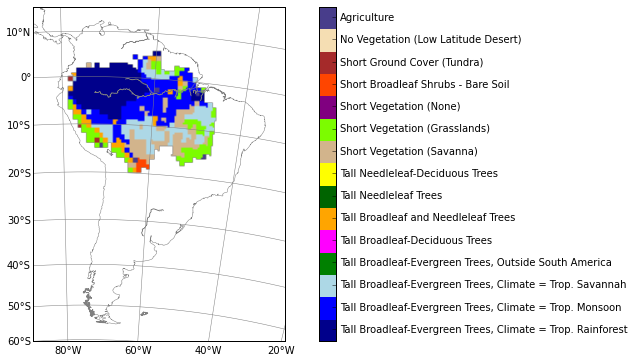

In [11]:
lons=np.arange(-179.5,180,1)
lats=np.arange(-89.5,90,1)

clrs = clrs_sib_koppen2
plotmap = biomes
maxnr = len(biomes_sib_koppen2)
labels = biomes_sib_koppen2
savename = 'SiBCASA_koppen_biome_amazon_map.png'

fig=plt.figure(figsize=(12,6))

#ax=fig.add_axes([0.05,0.1,0.7,0.8])
#m,nx,ny=select_map('Global Cylinder')

m,nx,ny=select_map('South America Albers')
fluxmap = m.transform_scalar((plotmap),lons,lats,nx,ny,order=0)
m.drawcoastlines(color='grey',linewidth=0.5)
m.drawparallels(np.arange(-60,30,10),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,0,20),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1])
cmap = mpl.colors.ListedColormap(clrs)
im=m.imshow(fluxmap,cmap=cmap)
#bounds=np.arange(-0.5,maxnr+0.5,1)
ticks=np.arange(1.5,15.5,0.933)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="4%", pad=0.2)
#cbar=plt.colorbar(im,boundaries=bounds,ticks=ticks,cax=cax)
cbar=plt.colorbar(im,ticks=ticks)
cbar.ax.set_yticklabels(labels,va='center',fontsize=10)
fig.savefig(savename)
plt.show()
#GRASSLANDS CORRESPOND TO SAVANNA - CHECK IT

In [12]:
######################################## AREA analysis for the biome map #############################################
# This are basically the areas assigned to each biome in SiBCASA
biome_names_list = []
area_list = []
for b in range(16):
    biome_names_list.append(biomes_sib_koppen[b])
    maskb = np.zeros((180,360))+1
    maskb = np.ma.masked_where(biomes*mask!=b,maskb)
    area = ((maskb*glarea).sum())/1e6
    area_list.append('%.2f'%(area))
    data_series_area = {'Area km2':area_list}
    df_areas = pd.DataFrame(data_series_area,index=biome_names_list)

    #print biomes_sib_koppen[b],((maskb*glarea).sum())/1e6,'km2'
#df_areas

df_areas = df_areas.drop(df_areas.index[0])
df_areas

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/ma/core.py:4139: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


,Area km2
"Tall Broadleaf-Evergreen Trees, Climate = Trop. Rainforest",1801349.90
"Tall Broadleaf-Evergreen Trees, Climate = Trop. Monsoon",1694827.58
"Tall Broadleaf-Evergreen Trees, Climate = Trop. Savannah",1218095.56
"Tall Broadleaf-Evergreen Trees, Outside South America",nan
Tall Broadleaf-Deciduous Trees,nan
Tall Broadleaf and Needleleaf Trees,340000.90
Tall Needleleaf Trees,nan
Tall Needleleaf-Deciduous Trees,nan
Short Vegetation (Savanna),979284.10
Short Vegetation (Grasslands),847245.66


[25.55779466073087, 24.046441657438915, 17.28250363775965, 4.8239784989377643, 13.894214523407495, 12.020835377666163, 0.9990494035014561, 0.51848168107668935, 0.85670055948099144] 100.0


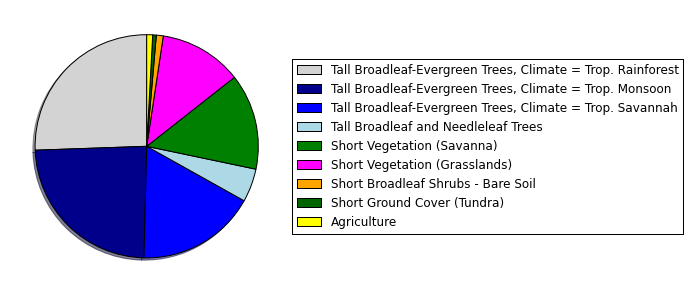

In [14]:
df_areas = df_areas.astype(float)
areas = df_areas['Area km2'].values
total_area = df_areas.sum()
pie_list = []
legenda=['Tall Broadleaf-Evergreen Trees, Climate = Trop. Rainforest',
         'Tall Broadleaf-Evergreen Trees, Climate = Trop. Monsoon',
         'Tall Broadleaf-Evergreen Trees, Climate = Trop. Savannah',
         'Tall Broadleaf and Needleleaf Trees',                         #6
         'Short Vegetation (Savanna)',                                  #9
         'Short Vegetation (Grasslands)',                               #10
         'Short Broadleaf Shrubs - Bare Soil',                          #12
         'Short Ground Cover (Tundra)',                                 #13
         'Agriculture']                                                 #15
fig = plt.figure(1,figsize=(5,5))
for i in areas:
    pie_list.append((i/total_area[0])*100)
pie_list = [x for x in pie_list if str(x) != 'nan']
print pie_list, sum(pie_list)

plt.pie(pie_list,colors=clrs_sib_koppen,startangle=90,shadow=True)
plt.legend(legenda,loc='center left',bbox_to_anchor=(1, 0.5)) 
fig.savefig('BiomePercentageAreaSiBCASA.png')

In [16]:
df_areas = df_areas.astype(float)
total_area = df_areas.sum()
total_area

Area km2    7048142.94
dtype: float64